<a href="https://colab.research.google.com/github/Subin-Jin/study/blob/master/%EC%84%9C%EC%9A%B8%EC%8B%9C_%EB%B2%94%EC%A3%84%C2%B7%EC%95%88%EC%A0%84_%ED%98%84%ED%99%A9_%EB%B6%84%EC%84%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 서울시 범죄·안전 현황 분석 프로젝트 ##
2021년도 서울특별시 데이터를 이용하여 범죄영향요인을 파악하고, 지역안전지수 예측 목적

(1) 기획 의도  
- 최근 재해/범죄 이슈 관련 사회적 관심도 증가
- 데이터를 기반으로 서울시가 얼마나 안전한지, 어떤 요인이 크게 영향을 미치는지 직접 확인해보고자 함

(2) 문제 정의
   - 본격적인 분석 수행 전, 치안 관련 예방 / 선제적 대응 관점과 사건 발생 후 대응 / 수습 관점 어디에 포커스를 둘 것인지 논의 진행
    1. 예방, 선제적 대응 관점:
    - 구역별 파출소, 경찰소의 수가 적절한가? (1개소당 시민 수)
    - CCTV나 안전비상벨 등 관련 시설은 충분한가?
    - 안전비상벨이 관련 기관과 잘 연결되어 있는가?  
    → **설치된 자원이 적재적소에 사용되고 있는지 살펴볼 필요가 있음**
    
    2. 사건 발생 후의 대응과 수습 관점:
    - 연도별 범죄현장 평균 도착시간 : 4분대로 큰 변동이 없음. 긴급과 비긴급의 차이도 크지 않음.
    - 신고 접수 후 5분 내 도착률이 점차 증가하는 추세.

- 위 내용을 기반으로, 현재 한국의 치안 관련 문제에서는 **사전 예방과 선제적 대응**이 더욱 중요하다고 판단되어  
  **범죄영향요인 파악**을 우선 목표로 설정

## Column 정보 ##

모든 데이터는 2020년 기준으로 작성됨.

**면적 (㎢)** : 행정동별 면적  
**인구밀도 (명/㎢)** : 주민등록인구 / 면적  
**기초수급자수** : 파악된 기초수급자 인원  
**한국인_남성** : 등록된 한국인 남성의 수  
**한국인_여성** : 등록된 한국인 여성의 수  
**외국인_남성** : 등록된 외국인 남성의 수  
**외국인_여성** : 등록된 외국인 여성의 수  
**평균연령** : 행정동별 주민등록인구의 평균 연령  
**중위연령** : 행정동별 주민등록인구의 중위 연령  
**고령자_남성** : 주민등록인구 중 65세 이상 남성의 수  
**고령자_여성** : 주민등록인구 중 65세 이상 여성의 수  
**혼인건수** : 행정동별 연간 혼인 건수  
**이혼건수** : 행정동별 연간 이혼 건수  
**장애인_남성** : 장애 등급을 받은 남성의 수  
**장애인_여성** : 장애 등급을 받은 여성의 수  
**지적장애인_남성** : 지적장애 등급을 받은 남성의 수  
**지적장애인_여성** : 지적장애 등급을 받은 여성의 수  
**유년부양비** : 생산가능인구(15∼64세)에 대한 유소년인구(0∼14세)의 합의 백분비  
**노년부양비** : 생산가능인구(15∼64세)에 대한 고령인구(65세 이상)의 합의 백분비  
**노령화지수** : 유소년(14세이하) 인구 100명에 대한 고령(65세이상) 인구의 비  
**범죄발생등급_살인** : 살인 발생 횟수를 기반으로 통계적으로 만들어진 등급  
**범죄발생등급_강도** : 강도 발생 횟수를 기반으로 통계적으로 만들어진 등급  
**범죄발생등급_방화** : 방화 발생 횟수를 기반으로 통계적으로 만들어진 등급  
**범죄발생등급_폭력** : 폭력 발생 횟수를 기반으로 통계적으로 만들어진 등급  
**범죄발생등급_절도** : 절도 발생 횟수를 기반으로 통계적으로 만들어진 등급  

범죄발생등급은 행정동 수준 범죄지도* 자료를 활용함. 1이 가장 안전하고 5로 갈수록 위험함.

* 장현석⋅홍명기⋅이경아⋅조은비(2021). 서울시 행정동 수준의 범죄분포에 대한 탐색적 연구. 한국범죄학, 15(1), 79-86


## 데이터 전처리 ##

### 데이터 정제 ###

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf # 한글 나눔폰트 설치. 설치 후 런타임 다시 시작해야 함

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
crime = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BigMining/기말프로젝트/crime_Seoul.csv")

In [5]:
plt.rc('font', family='NanumBarunGothic')

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
crime.shape # 423개의 행, 27개의 열

(423, 27)

In [8]:
crime.info() # 컬럼별 데이터 타입과 결측치 개수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   자치구         423 non-null    object 
 1   동           423 non-null    object 
 2   면적 (㎢)      423 non-null    float64
 3   인구밀도 (명/㎢)  423 non-null    int64  
 4   기초수급자수      423 non-null    int64  
 5   한국인_남성      423 non-null    int64  
 6   한국인_여성      423 non-null    int64  
 7   외국인_남성      423 non-null    int64  
 8   외국인_여성      423 non-null    int64  
 9   평균연령        423 non-null    float64
 10  중위연령        423 non-null    float64
 11  고령자_남성      423 non-null    int64  
 12  고령자_여성      423 non-null    int64  
 13  혼인건수        423 non-null    int64  
 14  이혼건수        422 non-null    float64
 15  장애인_남성      423 non-null    int64  
 16  장애인_여성      423 non-null    int64  
 17  지적장애인_남성    423 non-null    int64  
 18  지적장애인_여성    422 non-null    float64
 19  유년부양비       423 non-null    f

In [9]:
crime.head()

,자치구,동,면적 (㎢),인구밀도 (명/㎢),기초수급자수,한국인_남성,한국인_여성,외국인_남성,외국인_여성,평균연령,중위연령,고령자_남성,고령자_여성,혼인건수,이혼건수,장애인_남성,장애인_여성,지적장애인_남성,지적장애인_여성,유년부양비,노년부양비,노령화지수,범죄발생등급_살인,범죄발생등급_강도,범죄발생등급_방화,범죄발생등급_폭력,범죄발생등급_절도
0,종로구,사직동,1.23,7972,129,4264,5262,164,116,45.4,45.5,793,1050,40,19.0,167,117,10,8.0,13.4,26.2,195.6,2,2,2,3,3
1,종로구,삼청동,1.49,1952,41,1272,1368,134,135,48.3,48.0,292,382,22,5.0,58,52,2,2.0,13.2,34.1,258.2,2,1,3,5,5
2,종로구,부암동,2.27,4552,150,4772,5250,165,146,44.8,45.6,811,1028,34,6.0,181,136,14,8.0,13.5,24.6,182.1,1,1,2,4,4
3,종로구,평창동,8.87,2095,137,8550,9841,86,105,44.9,46.4,1445,1953,58,24.0,290,248,20,16.0,14.5,25.6,177.1,3,2,2,5,3
4,종로구,무악동,0.36,23867,155,3979,4567,20,26,43.1,45.1,622,838,18,8.0,181,147,14,13.0,20.1,24.6,122.1,3,1,2,4,4


In [10]:
crime.describe()

,면적 (㎢),인구밀도 (명/㎢),기초수급자수,한국인_남성,한국인_여성,외국인_남성,외국인_여성,평균연령,중위연령,고령자_남성,고령자_여성,혼인건수,이혼건수,장애인_남성,장애인_여성,지적장애인_남성,지적장애인_여성,유년부양비,노년부양비,노령화지수,범죄발생등급_살인,범죄발생등급_강도,범죄발생등급_방화,범죄발생등급_폭력,범죄발생등급_절도
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,422.000000,423.000000,423.000000,423.000000,422.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,1.425343,23766.664303,847.153664,11095.907801,11721.898345,271.262411,301.529551,43.559338,43.622222,1637.224586,2064.995272,105.654846,38.362559,539.099291,391.472813,39.156028,24.682464,13.406383,22.061939,190.113002,2.607565,2.768322,3.111111,2.271868,2.588652
std,1.580896,11708.696032,667.819542,4334.901557,4676.954939,468.594060,428.196586,2.608917,3.806191,639.242435,819.086501,57.941211,18.957355,282.762036,215.291214,28.523944,17.684719,4.982418,5.171027,88.327418,1.148723,1.287283,1.261701,1.141355,1.119014
min,0.230000,215.000000,5.000000,1027.000000,720.000000,5.000000,2.000000,35.000000,29.100000,148.000000,135.000000,8.000000,1.000000,20.000000,9.000000,0.000000,0.000000,2.700000,9.800000,31.100000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.670000,14880.000000,372.000000,8129.000000,8657.000000,68.000000,89.000000,41.800000,41.500000,1205.000000,1484.000000,66.500000,25.000000,333.500000,238.000000,21.000000,13.000000,10.100000,18.700000,129.100000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,0.970000,23911.000000,695.000000,10734.000000,11293.000000,131.000000,157.000000,43.400000,43.600000,1570.000000,1966.000000,91.000000,36.000000,484.000000,346.000000,33.000000,21.000000,12.700000,21.700000,180.700000,3.000000,3.000000,3.000000,2.000000,2.000000
75%,1.490000,32436.500000,1146.000000,13589.500000,14429.000000,254.000000,314.000000,45.200000,46.150000,1998.500000,2531.000000,133.500000,48.000000,692.500000,506.500000,49.500000,32.000000,15.900000,25.050000,230.350000,3.000000,4.000000,4.000000,3.000000,3.000000
max,12.680000,57502.000000,5485.000000,26765.000000,30257.000000,4788.000000,3661.000000,52.300000,54.200000,3689.000000,4779.000000,329.000000,111.000000,2118.000000,1709.000000,334.000000,131.000000,34.900000,44.000000,709.500000,5.000000,5.000000,5.000000,5.000000,5.000000


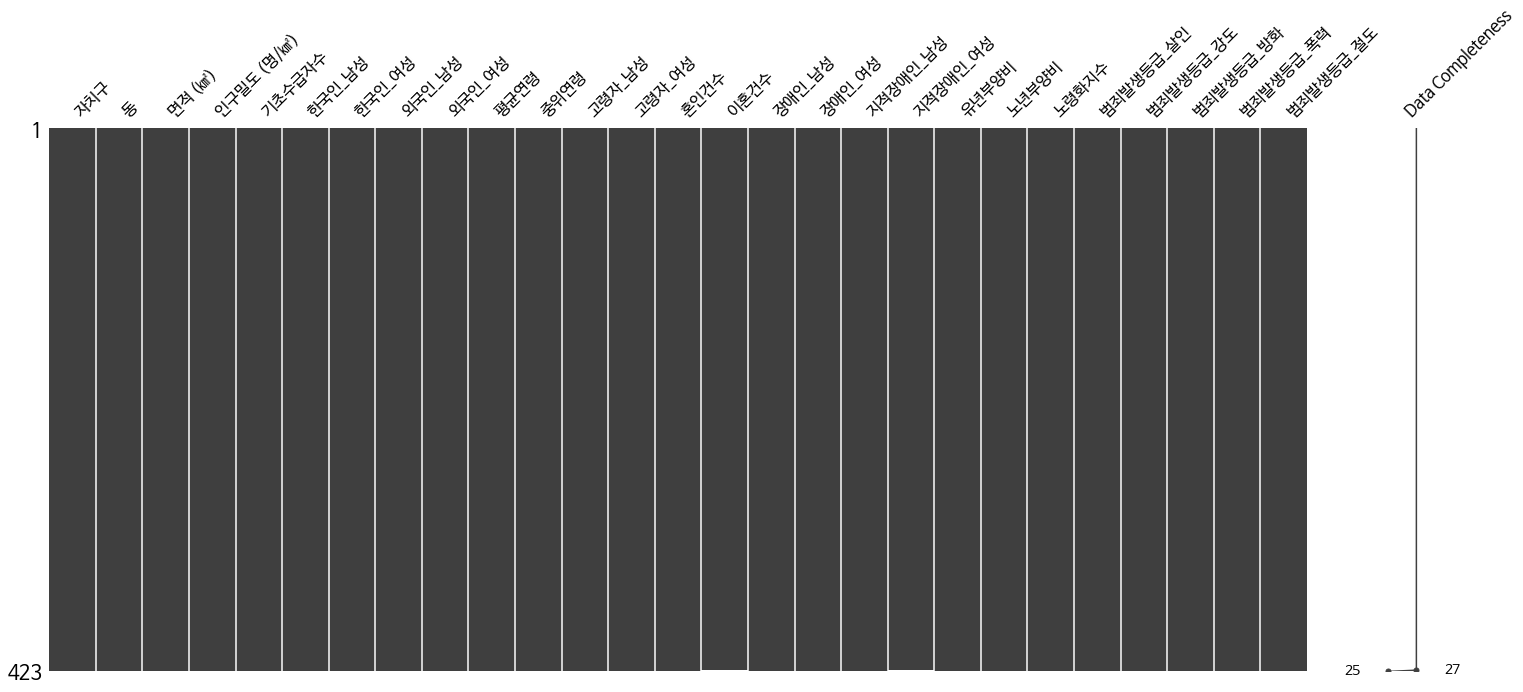

In [11]:
import missingno as msno
msno.matrix(crime, labels= True) # 결측치 시각적으로 확인

In [12]:
crime.isnull().sum()

자치구           0
동             0
면적 (㎢)        0
인구밀도 (명/㎢)    0
기초수급자수        0
한국인_남성        0
한국인_여성        0
외국인_남성        0
외국인_여성        0
평균연령          0
중위연령          0
고령자_남성        0
고령자_여성        0
혼인건수          0
이혼건수          1
장애인_남성        0
장애인_여성        0
지적장애인_남성      0
지적장애인_여성      1
유년부양비         0
노년부양비         0
노령화지수         0
범죄발생등급_살인     0
범죄발생등급_강도     0
범죄발생등급_방화     0
범죄발생등급_폭력     0
범죄발생등급_절도     0
dtype: int64

In [13]:
crime[crime['이혼건수'].isnull()] # 결측치 있는 행이 동일한 행인지 확인.
# 해당 행의 NaN값을 그 컬럼의 평균치로 대체함.
crime.fillna(crime.mean(), inplace=True)

<ipython-input-13-90d1b084924c>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.fillna(crime.mean(), inplace=True)


### EDA ###

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


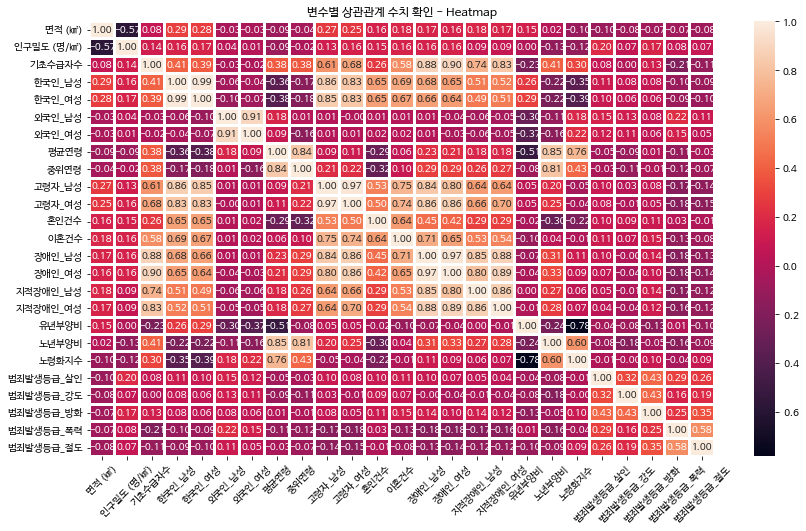

In [14]:
plt.figure(figsize=(14, 8))

heat_map = sns.heatmap(crime.corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = 2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation = 45)
plt.title("변수별 상관관계 수치 확인 - Heatmap")
plt.show()

# 각 변수별 상관관계 및 변수들과 범죄발생등급과의 관계를 확인함.
# 유년부양비와 노령화지수 변수가 서로 강한 음의 상관관계를 가진 것이 눈에 띈다.

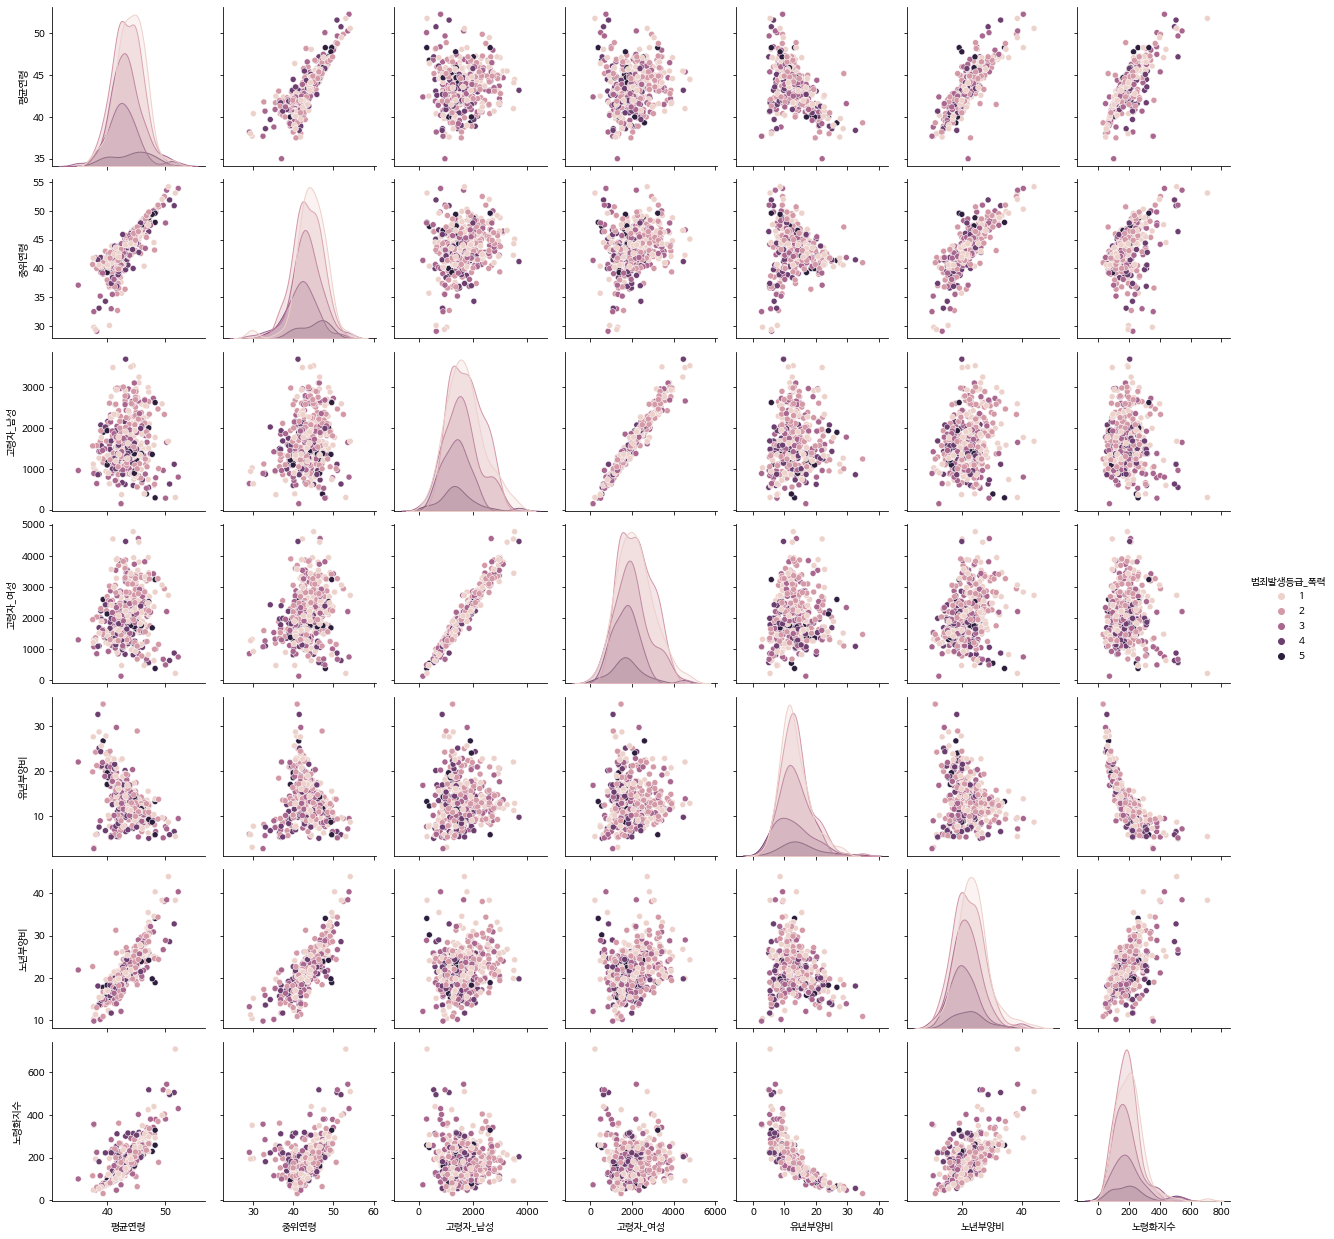

In [15]:
sns.pairplot(vars=['평균연령', '중위연령', '고령자_남성', '고령자_여성',
                   '유년부양비', '노년부양비', '노령화지수'], hue='범죄발생등급_폭력', data=crime)
plt.show() # 연령 관련 요인에 대한 산점도 그리기. 폭력 발생 등급 카테고리로 값을 구분했다.
# 평균연령과 중위연령이 양의 상관관계를 가진다. 비슷한 feature이므로 중위연령은 삭제한다.
# 유년부양비와 노년부양비, 유년부양비와 노령화지수 관계에서 의외로 음의 상관관계가 뚜렷하게 나타나지 않았다.

In [16]:
crime = crime.drop(["중위연령"], axis=1)
crime.head()

,자치구,동,면적 (㎢),인구밀도 (명/㎢),기초수급자수,한국인_남성,한국인_여성,외국인_남성,외국인_여성,평균연령,고령자_남성,고령자_여성,혼인건수,이혼건수,장애인_남성,장애인_여성,지적장애인_남성,지적장애인_여성,유년부양비,노년부양비,노령화지수,범죄발생등급_살인,범죄발생등급_강도,범죄발생등급_방화,범죄발생등급_폭력,범죄발생등급_절도
0,종로구,사직동,1.23,7972,129,4264,5262,164,116,45.4,793,1050,40,19.0,167,117,10,8.0,13.4,26.2,195.6,2,2,2,3,3
1,종로구,삼청동,1.49,1952,41,1272,1368,134,135,48.3,292,382,22,5.0,58,52,2,2.0,13.2,34.1,258.2,2,1,3,5,5
2,종로구,부암동,2.27,4552,150,4772,5250,165,146,44.8,811,1028,34,6.0,181,136,14,8.0,13.5,24.6,182.1,1,1,2,4,4
3,종로구,평창동,8.87,2095,137,8550,9841,86,105,44.9,1445,1953,58,24.0,290,248,20,16.0,14.5,25.6,177.1,3,2,2,5,3
4,종로구,무악동,0.36,23867,155,3979,4567,20,26,43.1,622,838,18,8.0,181,147,14,13.0,20.1,24.6,122.1,3,1,2,4,4


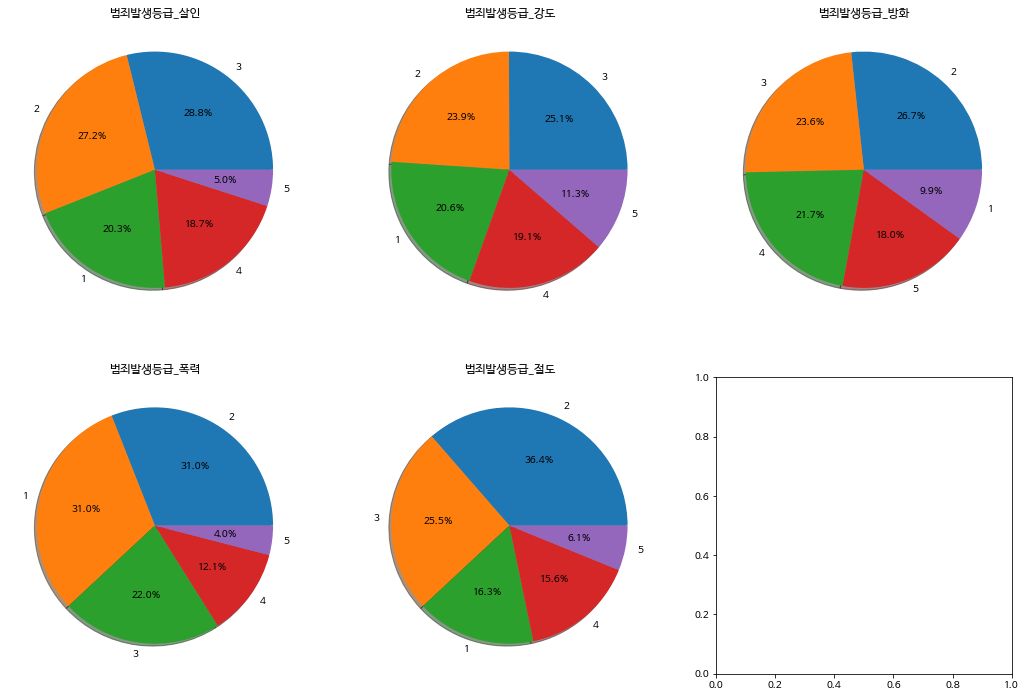

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

ax[0][0].set_title('범죄발생등급_살인')
crime["범죄발생등급_살인"].value_counts().plot.pie(ax=ax[0][0], autopct='%1.1f%%', shadow=True)
ax[0][0].set_ylabel('')
ax[0][1].set_title('범죄발생등급_강도')
crime["범죄발생등급_강도"].value_counts().plot.pie(ax=ax[0][1], autopct='%1.1f%%', shadow=True)
ax[0][1].set_ylabel('')
ax[0][2].set_title('범죄발생등급_방화')
crime["범죄발생등급_방화"].value_counts().plot.pie(ax=ax[0][2], autopct='%1.1f%%', shadow=True)
ax[0][2].set_ylabel('')
ax[1][0].set_title('범죄발생등급_폭력')
crime["범죄발생등급_폭력"].value_counts().plot.pie(ax=ax[1][0], autopct='%1.1f%%', shadow=True)
ax[1][0].set_ylabel('')
ax[1][1].set_title('범죄발생등급_절도')
crime["범죄발생등급_절도"].value_counts().plot.pie(ax=ax[1][1], autopct='%1.1f%%', shadow=True)
ax[1][1].set_ylabel('')

plt.show()

# 범죄 유형별 등급 분포도 확인.
# 강도범죄가 가장 골고루 분산되어 있으므로, 추후 분류모델 적용 시 해당 컬럼을 label로 선택함.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


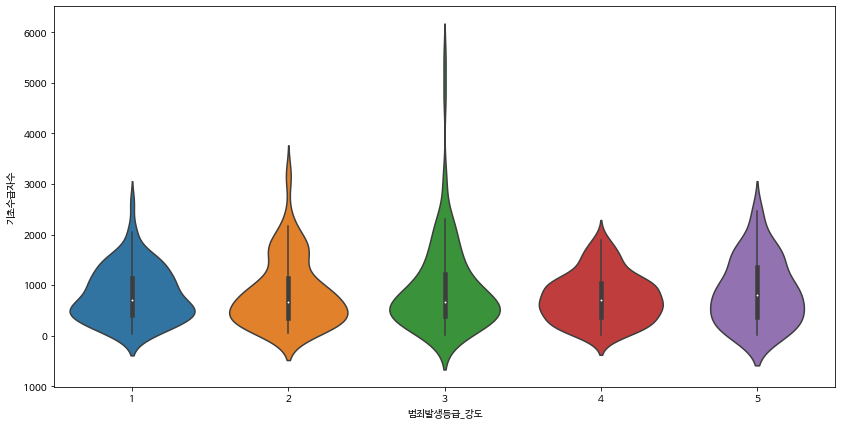

In [18]:
# 강도 관련 범죄등급과 기초수급자수 관계 확인

plt.figure(figsize=(14, 7))

sns.violinplot(x = "범죄발생등급_강도", y = "기초수급자수", data = crime)

### 데이터 스케일링 ###

In [19]:
# '자치구', '동' 컬럼은 데이터 분석 시 제외함.
# 범죄발생등급을 제외한 모든 feature가 수치형이므로 스케일링 필요.
# 범죄발생등급 컬럼들은 이미 레이블 인코딩 되어있으므로 별도 인코딩 수행하지 않음.
# (회귀분석이었다면 one-hot encoding 적용 필요했겠지만, 분류 모델이므로 미적용)

X1 = crime[['범죄발생등급_살인', '범죄발생등급_강도',
            '범죄발생등급_방화',	'범죄발생등급_폭력',
            '범죄발생등급_절도']] #X1은 범주형 데이터
X1.head()

,범죄발생등급_살인,범죄발생등급_강도,범죄발생등급_방화,범죄발생등급_폭력,범죄발생등급_절도
0,2,2,2,3,3
1,2,1,3,5,5
2,1,1,2,4,4
3,3,2,2,5,3
4,3,1,2,4,4


In [20]:
X2 = crime[['면적 (㎢)',	'인구밀도 (명/㎢)',	'기초수급자수',	'한국인_남성',
            '한국인_여성',	'외국인_남성',	'외국인_여성',	'평균연령',
            '고령자_남성',	'고령자_여성',	'혼인건수',	'이혼건수',	'장애인_남성',
            '장애인_여성',	'지적장애인_남성',	'지적장애인_여성',	'유년부양비',
            '노년부양비',	'노령화지수']] #X2는 수치형 데이터 (스케일링 필요)
X2.head()

,면적 (㎢),인구밀도 (명/㎢),기초수급자수,한국인_남성,한국인_여성,외국인_남성,외국인_여성,평균연령,고령자_남성,고령자_여성,혼인건수,이혼건수,장애인_남성,장애인_여성,지적장애인_남성,지적장애인_여성,유년부양비,노년부양비,노령화지수
0,1.23,7972,129,4264,5262,164,116,45.4,793,1050,40,19.0,167,117,10,8.0,13.4,26.2,195.6
1,1.49,1952,41,1272,1368,134,135,48.3,292,382,22,5.0,58,52,2,2.0,13.2,34.1,258.2
2,2.27,4552,150,4772,5250,165,146,44.8,811,1028,34,6.0,181,136,14,8.0,13.5,24.6,182.1
3,8.87,2095,137,8550,9841,86,105,44.9,1445,1953,58,24.0,290,248,20,16.0,14.5,25.6,177.1
4,0.36,23867,155,3979,4567,20,26,43.1,622,838,18,8.0,181,147,14,13.0,20.1,24.6,122.1


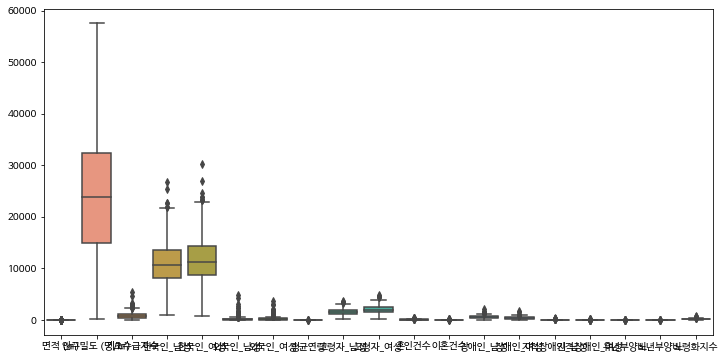

In [21]:
# 민맥스 스케일링은 회귀에 적합, 스탠다드 스케일링은 분류에 적합
# StandardScaler - 이상치에 민감하므로, 이상치 미리 확인해보기
plt.figure(figsize = (12, 6))
sns.boxplot(data = X2)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e5186e490>,
      dtype=object)

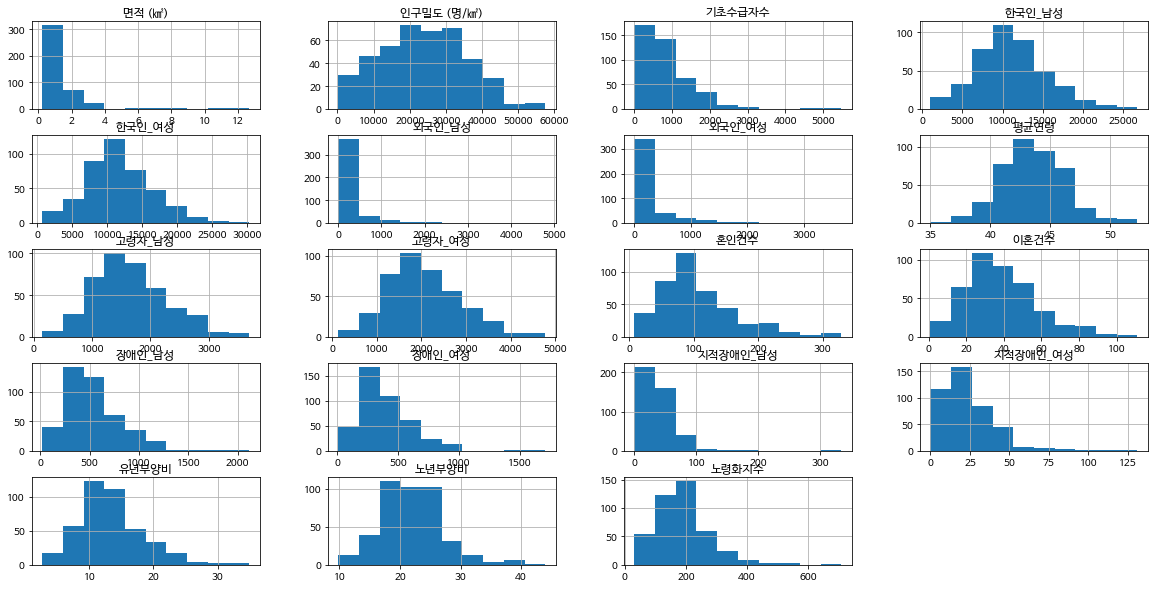

In [22]:
pd.DataFrame(X2).hist(figsize=(20,10))

In [23]:
# 이상치가 크게 나타나므로 이상치 영향을 최소화한 RobustScaler 사용

from sklearn.preprocessing import RobustScaler
rst = RobustScaler()
X2_scaled = rst.fit_transform(X2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e51f145e0>,
      dtype=object)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


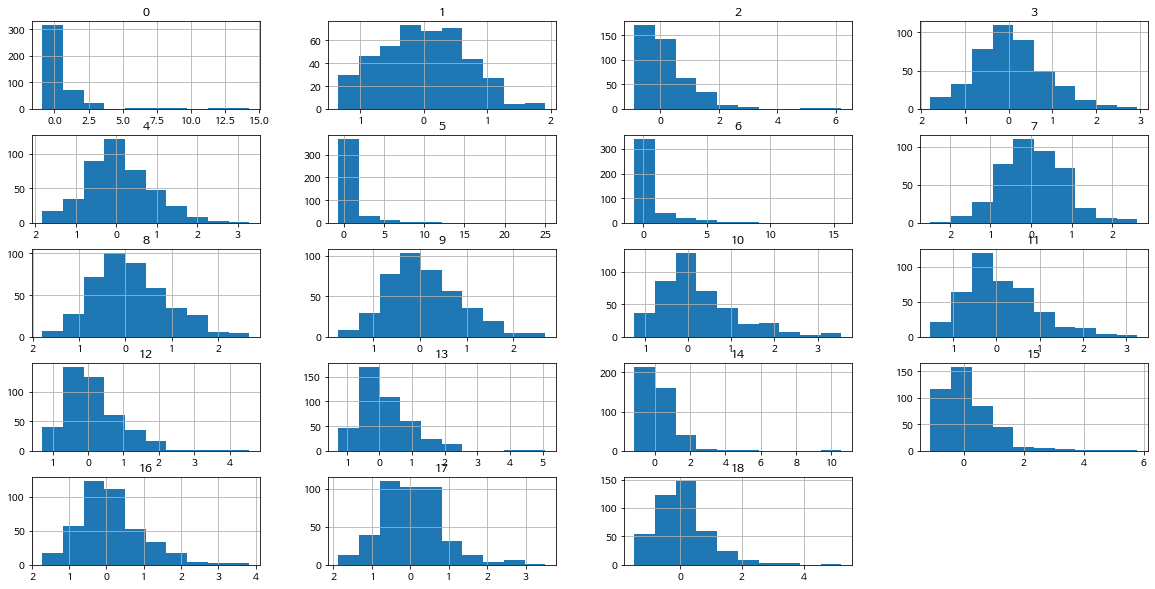

In [24]:
pd.DataFrame(X2_scaled).hist(figsize=(20,10))

In [25]:
X2_scaled = pd.DataFrame(X2_scaled, columns = ('면적 (㎢)',	'인구밀도 (명/㎢)',	'기초수급자수',	'한국인_남성',
            '한국인_여성',	'외국인_남성',	'외국인_여성',	'평균연령',
            '고령자_남성',	'고령자_여성',	'혼인건수',	'이혼건수',	'장애인_남성',
            '장애인_여성',	'지적장애인_남성',	'지적장애인_여성',	'유년부양비',
            '노년부양비',	'노령화지수'))

In [26]:
# 변환된 데이터 통합
crime_con = pd.concat([X1, X2_scaled], axis=1)
crime_con.head()

,범죄발생등급_살인,범죄발생등급_강도,범죄발생등급_방화,범죄발생등급_폭력,범죄발생등급_절도,면적 (㎢),인구밀도 (명/㎢),기초수급자수,한국인_남성,한국인_여성,외국인_남성,외국인_여성,평균연령,고령자_남성,고령자_여성,혼인건수,이혼건수,장애인_남성,장애인_여성,지적장애인_남성,지적장애인_여성,유년부양비,노년부양비,노령화지수
0,2,2,2,3,3,0.317073,-0.907869,-0.731266,-1.184873,-1.044872,0.177419,-0.182222,0.588235,-0.979206,-0.874881,-0.761194,-0.739130,-0.883008,-0.852886,-0.807018,-0.684211,0.120690,0.708661,0.147160
1,2,1,3,5,5,0.634146,-1.250762,-0.844961,-1.732808,-1.719508,0.016129,-0.097778,1.441176,-1.610586,-1.512894,-1.029851,-1.347826,-1.186630,-1.094972,-1.087719,-1.000000,0.086207,1.952756,0.765432
2,1,1,2,4,4,1.585366,-1.102669,-0.704134,-1.091841,-1.046951,0.182796,-0.048889,0.411765,-0.956522,-0.895893,-0.850746,-1.304348,-0.844011,-0.782123,-0.666667,-0.684211,0.137931,0.456693,0.013827
3,3,2,2,5,3,9.634146,-1.242617,-0.720930,-0.399963,-0.251559,-0.241935,-0.231111,0.441176,-0.157530,-0.012416,-0.492537,-0.521739,-0.540390,-0.364991,-0.456140,-0.263158,0.310345,0.614173,-0.035556
4,3,1,2,4,4,-0.743902,-0.002506,-0.697674,-1.237066,-1.165281,-0.596774,-0.582222,-0.088235,-1.194707,-1.077364,-1.089552,-1.217391,-0.844011,-0.741155,-0.666667,-0.421053,1.275862,0.456693,-0.578765


In [27]:
crime_con.isnull().sum()

범죄발생등급_살인     0
범죄발생등급_강도     0
범죄발생등급_방화     0
범죄발생등급_폭력     0
범죄발생등급_절도     0
면적 (㎢)        0
인구밀도 (명/㎢)    0
기초수급자수        0
한국인_남성        0
한국인_여성        0
외국인_남성        0
외국인_여성        0
평균연령          0
고령자_남성        0
고령자_여성        0
혼인건수          0
이혼건수          0
장애인_남성        0
장애인_여성        0
지적장애인_남성      0
지적장애인_여성      0
유년부양비         0
노년부양비         0
노령화지수         0
dtype: int64

## k-means 클러스터링 ##

In [31]:
# !pip install mglearn
# !pip install --upgrade joblib==1.1.0
# import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


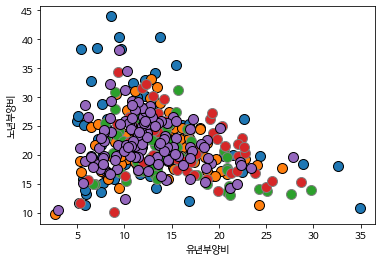

모든 데이터의 평균 실루엣 계수값: 0.34182394244434544
데이비스-볼딘지수: 0.9497966541707189


In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score 
from sklearn.metrics import davies_bouldin_score

km5 = KMeans(n_clusters=5, random_state=0).fit(X2)
# 군집의 개수는 기존 범죄발생등급 군집과 비교하기 위해 5개로 설정
# 스케일링되지 않은 데이터 사용
labels = km5.labels_

mglearn.discrete_scatter(X2['유년부양비'], X2['노년부양비'],labels , markers='o')
plt.xlabel("유년부양비")
plt.ylabel("노년부양비")
plt.show()

average_score = silhouette_score(X2, labels)
print('모든 데이터의 평균 실루엣 계수값:', format(average_score)) # 1에 가까울수록 좋은 군집

dv = davies_bouldin_score(X2, labels)
print('데이비스-볼딘지수:', format(dv)) # 지수값이 작을수록 좋은 군집

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyt

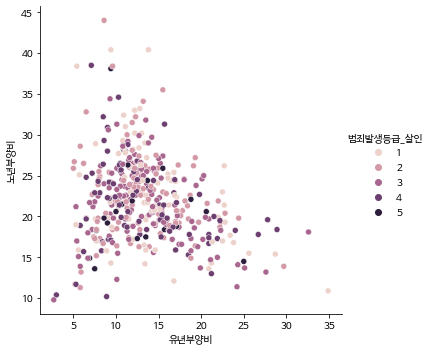

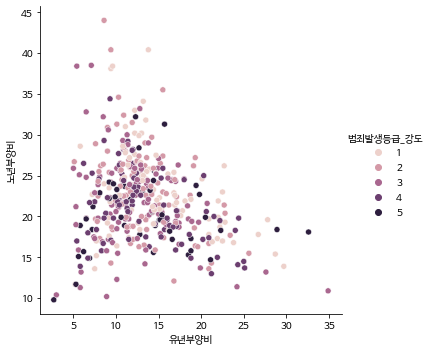

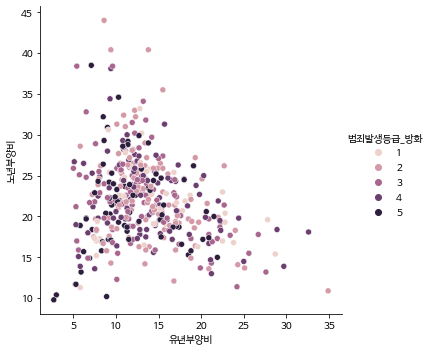

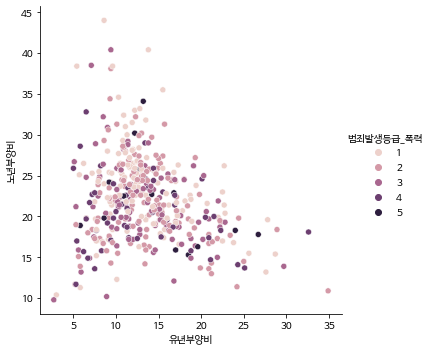

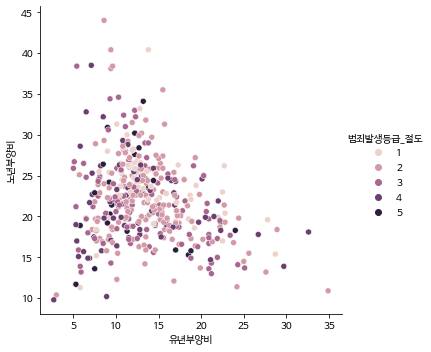

In [77]:
# 위에서 만든 군집은 기존대로의 분석 목적이라면 과하게 중첩되어 좋은 군집이 아님.
# 그러나 지금은 실제 범죄발생등급 군집과 비교하는 것이 목적이므로, 아래와 같이 차트를 그려 비교.

sns.relplot('유년부양비', '노년부양비', hue='범죄발생등급_살인', data=crime, ax=ax[0][0])
ax[0][0].set_ylabel('')
sns.relplot(x='유년부양비', y='노년부양비', hue='범죄발생등급_강도', data=crime, ax=ax[0][1])
ax[0][1].set_ylabel('')
sns.relplot(x='유년부양비', y='노년부양비', hue='범죄발생등급_방화', data=crime, ax=ax[0][2])
ax[0][2].set_ylabel('')
sns.relplot(x='유년부양비', y='노년부양비', hue='범죄발생등급_폭력', data=crime, ax=ax[1][0])
ax[1][0].set_ylabel('')
sns.relplot(x='유년부양비', y='노년부양비', hue='범죄발생등급_절도', data=crime, ax=ax[1][1])
ax[1][1].set_ylabel('')

plt.show()

범죄발생등급별 군집이 분석을 통해 만든 모델과 완전히 일치하지는 않으나  
절도 군집과 어느 정도 비슷한 양상을 보임.  
-> 인구통계학적 요인이 상대적 경범죄에 영향을 미칠 수 있다

## 분류모델 적용 ##

### 데이터셋 분리 ###

In [151]:
# 위에서 전처리 수행 시 이미 중위연령을 제외했으므로, X를 전체 feature로 불러옴.
# EDA 시 확인했던 것처럼 강도범죄가 가장 골고루 분산되어 있으므로, 해당 컬럼을 label로 선택함.
# 범죄발생등급_강도는 현재 5진 분류이므로, 이를 고위험군(4~5)과 저위험군(1~3)의 이진 분류로 변경

map_crime={1:'저위험군',2:'저위험군',3:'저위험군',4:'고위험군',5:'고위험군'}
crime_con['범죄발생등급_강도'] = crime_con['범죄발생등급_강도'].map(map_crime)

crime_con.head()

,범죄발생등급_살인,범죄발생등급_강도,범죄발생등급_방화,범죄발생등급_폭력,범죄발생등급_절도,면적 (㎢),인구밀도 (명/㎢),기초수급자수,한국인_남성,한국인_여성,외국인_남성,외국인_여성,평균연령,고령자_남성,고령자_여성,혼인건수,이혼건수,장애인_남성,장애인_여성,지적장애인_남성,지적장애인_여성,유년부양비,노년부양비,노령화지수
0,2,저위험군,2,3,3,0.317073,-0.907869,-0.731266,-1.184873,-1.044872,0.177419,-0.182222,0.588235,-0.979206,-0.874881,-0.761194,-0.739130,-0.883008,-0.852886,-0.807018,-0.684211,0.120690,0.708661,0.147160
1,2,저위험군,3,5,5,0.634146,-1.250762,-0.844961,-1.732808,-1.719508,0.016129,-0.097778,1.441176,-1.610586,-1.512894,-1.029851,-1.347826,-1.186630,-1.094972,-1.087719,-1.000000,0.086207,1.952756,0.765432
2,1,저위험군,2,4,4,1.585366,-1.102669,-0.704134,-1.091841,-1.046951,0.182796,-0.048889,0.411765,-0.956522,-0.895893,-0.850746,-1.304348,-0.844011,-0.782123,-0.666667,-0.684211,0.137931,0.456693,0.013827
3,3,저위험군,2,5,3,9.634146,-1.242617,-0.720930,-0.399963,-0.251559,-0.241935,-0.231111,0.441176,-0.157530,-0.012416,-0.492537,-0.521739,-0.540390,-0.364991,-0.456140,-0.263158,0.310345,0.614173,-0.035556
4,3,저위험군,2,4,4,-0.743902,-0.002506,-0.697674,-1.237066,-1.165281,-0.596774,-0.582222,-0.088235,-1.194707,-1.077364,-1.089552,-1.217391,-0.844011,-0.741155,-0.666667,-0.421053,1.275862,0.456693,-0.578765


In [152]:
X = crime_con.drop("범죄발생등급_강도", axis=1)
y = crime_con["범죄발생등급_강도"]

In [153]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, random_state=42, test_size=0.1)

### 결정 트리 ###

In [154]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [155]:
from sklearn.metrics import accuracy_score

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.6981
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [156]:
#GridsearchCV

from sklearn.model_selection import GridSearchCV

params = {
    'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    'min_samples_split': [2, 4, 8, 12, 16, 20, 24, 32]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
GridSearchCV 최고 평균 정확도 수치:0.7035
GridSearchCV 최적 하이퍼 파라미터: {'min_samples_leaf': 6, 'min_samples_split': 20}


In [157]:
from sklearn.metrics import classification_report

best_df_clf = grid_cv.best_estimator_
pred_df = best_df_clf.predict(X_test)

cfreport_df=classification_report(y_test, pred_df)

print("의사결정나무 분류예측 레포트:\n", cfreport_df)

의사결정나무 분류예측 레포트:
               precision    recall  f1-score   support

        고위험군       0.43      0.50      0.46        30
        저위험군       0.79      0.74      0.76        76

    accuracy                           0.67       106
   macro avg       0.61      0.62      0.61       106
weighted avg       0.69      0.67      0.68       106



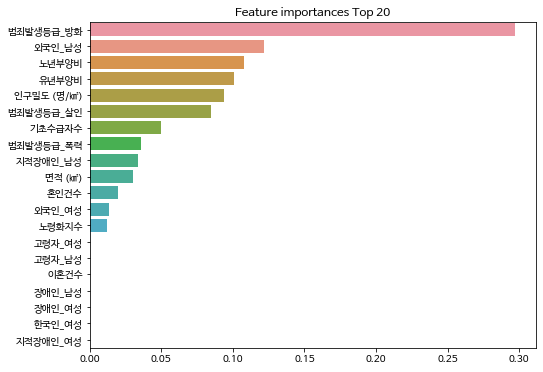

In [158]:
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

### 랜덤 포레스트 ###

In [159]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.7925


In [160]:
params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 ) #n_jobs=-1로 설정하면 모든 cpu 코어를 다 씀
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 16}
최고 예측 정확도: 0.7162


In [161]:
rf_clf1 = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8,
                                 min_samples_leaf=1, min_samples_split=16)
rf_clf1.fit(X_train , y_train)
pred_rf = rf_clf1.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.7925


In [162]:
cfreport_rf=classification_report(y_test, pred_rf)

print("랜덤포레스트 분류예측 레포트:\n", cfreport_rf)

랜덤포레스트 분류예측 레포트:
               precision    recall  f1-score   support

        고위험군       0.79      0.37      0.50        30
        저위험군       0.79      0.96      0.87        76

    accuracy                           0.79       106
   macro avg       0.79      0.66      0.68       106
weighted avg       0.79      0.79      0.76       106



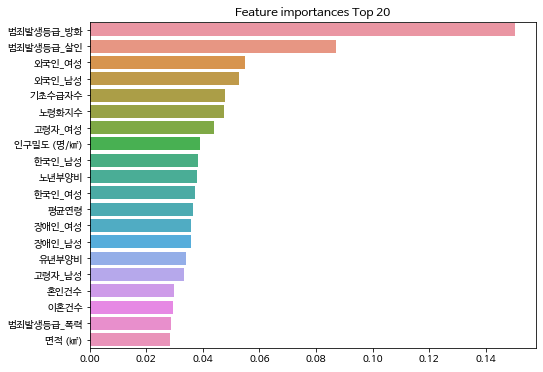

In [163]:
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

### 로지스틱 회귀 ###

In [164]:
from sklearn.linear_model import LogisticRegression

lgst_clf = LogisticRegression(max_iter = 500, solver = 'saga', n_jobs = -1)
lgst_clf.fit(X_train, y_train)
preds_lgst = lgst_clf.predict(X_test)
accuracy = accuracy_score(y_test , preds_lgst)
print('로지스틱 회귀 정확도: {0:.4f}'.format(accuracy))

로지스틱 회귀 정확도: 0.7736


In [165]:
params = {'penalty' : ['l2','l1'], # l1, l2 규제 적용 관련
         'C':[0.01, 0.1, 1, 1, 5, 10]}

grid = GridSearchCV(lgst_clf, param_grid = params, scoring = 'accuracy', cv=3)
grid.fit(X_train , y_train)
print('최적 하이퍼 파라미터 : {}, 최적 평균 정확도 : {:.3f}'.format(grid.best_params_, grid.best_score_))

최적 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도 : 0.732


In [167]:
lgst_clf1 = LogisticRegression(max_iter = 500, solver = 'saga', n_jobs = -1, C = 0.1, penalty = 'l2')
lgst_clf1.fit(X_train, y_train)
preds_lgst = lgst_clf.predict(X_test)

cfreport_lgst = classification_report(y_test, preds_lgst)

print("로지스틱회귀 분류예측 레포트:\n", cfreport_lgst)

로지스틱회귀 분류예측 레포트:
               precision    recall  f1-score   support

        고위험군       0.62      0.53      0.57        30
        저위험군       0.82      0.87      0.85        76

    accuracy                           0.77       106
   macro avg       0.72      0.70      0.71       106
weighted avg       0.77      0.77      0.77       106



### lightGBM ###

In [168]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=400, learning_rate=0.05)
lgbm_clf.fit(X_train , y_train)
pred_lgbm = lgbm_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred_lgbm)
print('lightGBM 정확도: {0:.4f}'.format(accuracy))

lightGBM 정확도: 0.7358


In [169]:
# early stopping 30으로 설정

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="logloss", 
             eval_set=evals, verbose=True)
preds_lgbm = lgbm_clf.predict(X_test)

[1]	training's binary_logloss: 0.591374	training's binary_logloss: 0.591374	valid_1's binary_logloss: 0.71542	valid_1's binary_logloss: 0.71542
Training until validation scores don't improve for 30 rounds.
[2]	training's binary_logloss: 0.575348	training's binary_logloss: 0.575348	valid_1's binary_logloss: 0.703036	valid_1's binary_logloss: 0.703036
[3]	training's binary_logloss: 0.560261	training's binary_logloss: 0.560261	valid_1's binary_logloss: 0.696296	valid_1's binary_logloss: 0.696296
[4]	training's binary_logloss: 0.547329	training's binary_logloss: 0.547329	valid_1's binary_logloss: 0.686738	valid_1's binary_logloss: 0.686738
[5]	training's binary_logloss: 0.535271	training's binary_logloss: 0.535271	valid_1's binary_logloss: 0.679605	valid_1's binary_logloss: 0.679605
[6]	training's binary_logloss: 0.524002	training's binary_logloss: 0.524002	valid_1's binary_logloss: 0.672934	valid_1's binary_logloss: 0.672934
[7]	training's binary_logloss: 0.51412	training's binary_logloss

In [170]:
cfreport_lgbm = classification_report(y_test, preds_lgbm)

print("lightGBM 분류예측 레포트:\n", cfreport_lgbm)

lightGBM 분류예측 레포트:
               precision    recall  f1-score   support

        고위험군       0.67      0.40      0.50        30
        저위험군       0.80      0.92      0.85        76

    accuracy                           0.77       106
   macro avg       0.73      0.66      0.68       106
weighted avg       0.76      0.77      0.75       106



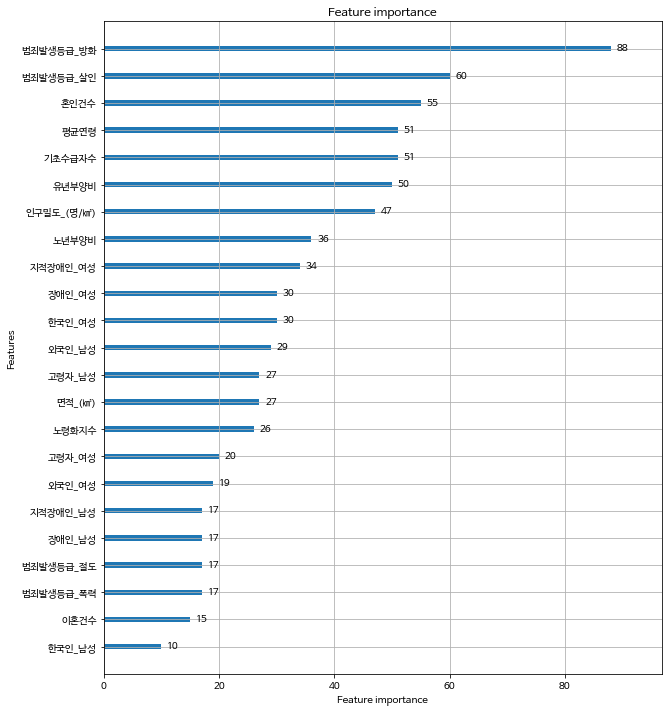

In [171]:
from lightgbm import plot_importance
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, ax=ax)
plt.show()

인구통계학적 요인을 feature로 만들고 강도범죄 위험군을 예측할 경우  
상당히 높은 수준(accuracy 0.7 이상)의 분류 모델이 만들어졌다.  
총 4가지 모델을 적용했는데, 정확도가 가장 높았던 모델은 랜덤포레스트 모델이었다.  
이 때의 feature importance는 다른 범죄발생등급, 등록외국인 수, 기초수급자수, 노령화지수 등이 높게 나타났다.